# Apply LDA for Feature Dimension Reduction followed by Classification by LogisticRegression - Comparing Results

In [ ]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot

We will use a Pipeline where the first step performs the LDA transform and selects the five most important dimensions or components, then fits a LogisticRegression model on these features. We don’t need to standardize the variables on this dataset, as all variables have the same scale by design.

The pipeline will be evaluated using repeated stratified cross-validation with three repeats and 10 folds per repeat. Performance is presented as the mean classification accuracy.

In [ ]:
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
	                           n_redundant=5, random_state=7, n_classes=10)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,10):
		steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), 
		         ('lr', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


>1 0.182 (0.027)
>2 0.215 (0.033)
>3 0.245 (0.037)
>4 0.294 (0.043)
>5 0.310 (0.043)
>6 0.305 (0.042)
>7 0.325 (0.046)
>8 0.335 (0.043)
>9 0.327 (0.038)


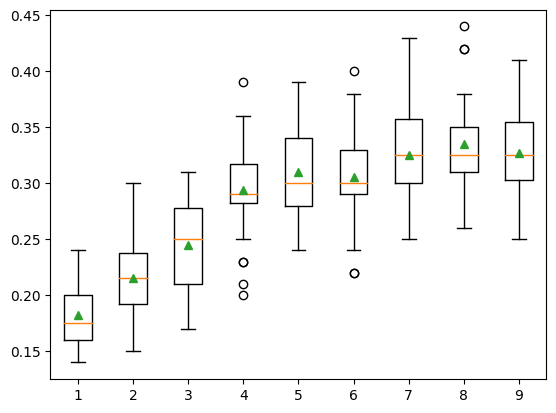

In [ ]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

A box and whisker plot is created for the distribution of accuracy scores for each configured number of dimensions.

We can see the trend of increasing classification accuracy with the number of components, with a limit at nine